### **Evaluate Feature Extractor**

Feature shape: (4366, 512)
Labels shape: (4366,)
Label distribution: [4354   12]


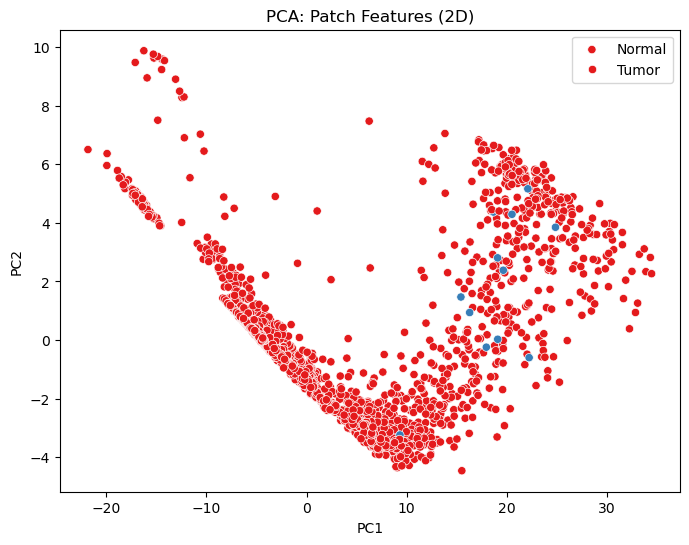

c:\Users\anaca\miniconda3\envs\secure-sight\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


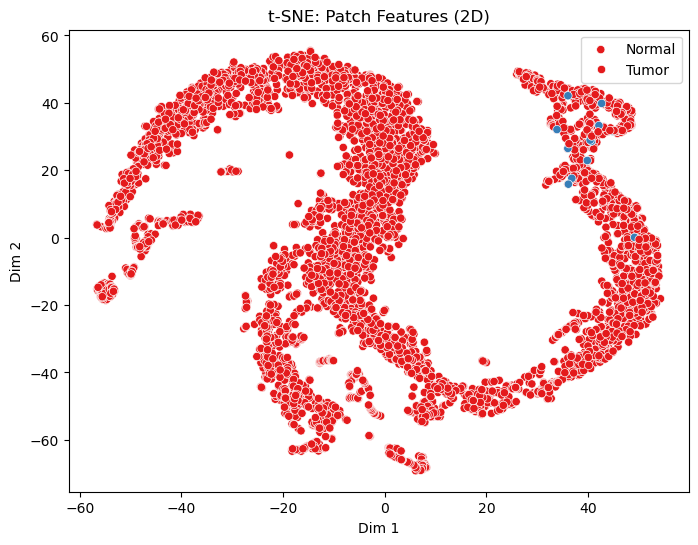

Logistic Regression Accuracy: 0.9966


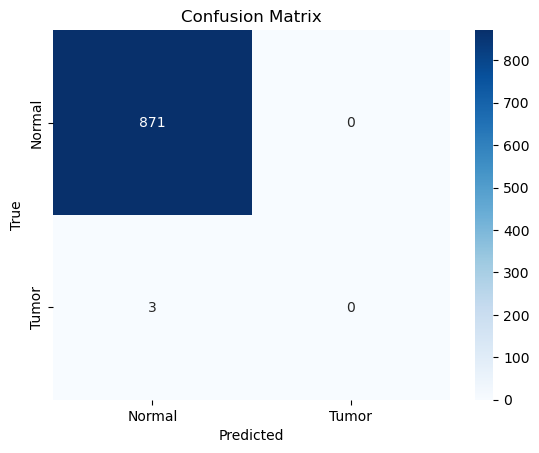

In [1]:
# Sanity Check of Extracted Patch Features 

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import os
import numpy as np

# Load extracted features and labels
features = np.load("patch_features_3.npy")     # shape: (N, 512)
labels = np.load("patch_labels_3.npy")         # shape: (N,)

print(f"Feature shape: {features.shape}")
print(f"Labels shape: {labels.shape}")
print(f"Label distribution: {np.bincount(labels)}")  # 0 = normal, 1 = tumor

# --------------------------------------
# 1. PCA Visualization (first 2 components)
# --------------------------------------
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features)

plt.figure(figsize=(8,6))
sns.scatterplot(x=features_pca[:,0], y=features_pca[:,1], hue=labels, palette='Set1')
plt.title("PCA: Patch Features (2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(["Normal", "Tumor"])
plt.show()

# --------------------------------------
# 2. t-SNE Visualization
# --------------------------------------
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
features_tsne = tsne.fit_transform(features)

plt.figure(figsize=(8,6))
sns.scatterplot(x=features_tsne[:,0], y=features_tsne[:,1], hue=labels, palette='Set1')
plt.title("t-SNE: Patch Features (2D)")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.legend(["Normal", "Tumor"])
plt.show()

# --------------------------------------
# 3. Logistic Regression on Extracted Features
# --------------------------------------
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Logistic Regression Accuracy: {acc:.4f}")
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Tumor"], yticklabels=["Normal", "Tumor"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
